# **Bismi Allah**

# **Projet d'ARN de fin de semestre** (SUITE 3/3)


        Travail réalisé par le binôme : 
            - SAYOUD Maissa 191931040670
            - BOULKABOUL Amira 202031043294

    Etudiantes en M1 SII Groupe 02

            


In [186]:
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

# for splitting data !
from sklearn.model_selection import train_test_split





# metriques d'evaluation 
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,recall_score,auc,roc_curve



# KNN
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Naive Bayes
from sklearn.naive_bayes import BernoulliNB


# Neural Network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Deep Learning

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



## 1. Chargement des datasets

In [2]:
# Définir X et y pour chaque type de vecteur de caractéristiques

X_binary = pd.read_csv("binary_features.csv")

X_count = pd.read_csv("count_features.csv")


Y_binary = pd.read_csv("sentiment140_preprocessed_reduced.csv", 
                       skiprows=1, 
                       names=["target"],
                       usecols=["target"])

Y_count = pd.read_csv("sentiment140_preprocessed_reduced.csv", 
                      skiprows=1, 
                      names=["target"],
                      usecols=["target"])


In [3]:
print("X_binary : ", X_binary.shape)
print("X_count : ", X_count.shape)
print()
print("Y_binary : ", Y_binary.shape)
print("Y_count : ", Y_count.shape)

X_binary :  (1588611, 240)
X_count :  (1588611, 240)

Y_binary :  (1588611, 1)
Y_count :  (1588611, 1)


In [4]:
X_binary


,get,day,good,work,like,love,got,today,time,lol,...,food,okay,till,iphon,cute,tho,almost,lunch,free,month
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588609,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_count.head()


,get,day,good,work,like,love,got,today,time,lol,...,food,okay,till,iphon,cute,tho,almost,lunch,free,month
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_binary.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
Y_count.tail()

,target
1588606,1
1588607,1
1588608,1
1588609,1
1588610,1


## 2. Diviser les données en données d'apprentissage et données de test


In [8]:
# Diviser les données en ensembles d'entraînement et de test (2/3 pour l'entraînement, 1/3 pour le test)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, Y_binary, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, Y_count, test_size=0.2, random_state=42)



In [9]:
# Convertir y_train_binary en un tableau unidimensionnel
y_train_binary = np.ravel(y_train_binary)
y_test_binary = np.ravel(y_test_binary)
y_train_count = np.ravel(y_train_count)
y_test_count = np.ravel(y_test_count)

In [10]:
print("X_train_binary:", X_train_binary.shape)
print("X_test_binary:", X_test_binary.shape)
print()
print("X_train_count:", X_train_count.shape)
print("X_test_count:", X_test_count.shape)
print()
print("y_train_binary:", y_train_binary.shape)
print("y_test_binary:", y_test_binary.shape)
print()
print("y_train_count:", y_train_count.shape)
print("y_test_count:", y_test_count.shape)

X_train_binary: (1270888, 240)
X_test_binary: (317723, 240)

X_train_count: (1270888, 240)
X_test_count: (317723, 240)

y_train_binary: (1270888,)
y_test_binary: (317723,)

y_train_count: (1270888,)
y_test_count: (317723,)


In [11]:
# Convertir y_train_binary en un tableau unidimensionnel
y_train_binary = np.ravel(y_train_binary)

# Convertir y_test_binary en un tableau unidimensionnel
y_test_binary = np.ravel(y_test_binary)

In [12]:
# Initialisation des listes pour stocker les performances
accuracies_bin = []
f1_scores_bin = []

accuracies_count = []
f1_scores_count = []

Fonction de la matrice de confusion

In [175]:
def plot_confusion_matrix(y_true, y_pred, title, labels=None):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Étape 2 : Classification


## 1. KNN

1.1. Binary

In [111]:
# Convertir les tableaux numpy en DataFrame
X_train_df = pd.DataFrame(X_train_binary)
X_test_df = pd.DataFrame(X_test_binary)
y_train_df = pd.DataFrame(y_train_binary)
y_test_df = pd.DataFrame(y_test_binary)

# Échantillonnage aléatoire de 200000 lignes
X_train_knn_binary, X_test_knn_binary, y_train_knn_binary, y_test_knn_binary = \
    [df.sample(n=200000, random_state=42) for df in [X_train_df, X_test_df, y_train_df, y_test_df]]

# Convertir les DataFrame en tableaux numpy
X_train_knn_binary = X_train_knn_binary.values
X_test_knn_binary = X_test_knn_binary.values
y_train_knn_binary = y_train_knn_binary.values.ravel()
y_test_knn_binary = y_test_knn_binary.values.ravel()



In [112]:
X_test_knn_binary.shape

(200000, 240)

In [113]:
y_test_knn_binary

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [114]:
# training
knn_binary = KNeighborsClassifier(n_neighbors=(777))

knn_binary.fit(X_train_knn_binary, y_train_knn_binary)


KNeighborsClassifier(n_neighbors=777)

In [115]:
# test / prediction
y_pred_knn_binary = knn_binary.predict(X_test_knn_binary)

In [116]:
# Evaluation
accuracy_binary_knn = accuracy_score(y_test_knn_binary, y_pred_knn_binary)
f1_knn = f1_score(y_test_knn_binary, y_pred_knn_binary)

print("Accuracy for binary features:", accuracy_binary_knn)
print("f1_score for binary features:", f1_knn)
print(classification_report(y_test_knn_binary, y_pred_knn_binary))


accuracies_bin.append(accuracy_binary_knn)
f1_scores_bin.append(f1_knn)

Accuracy for binary features: 0.67084
f1_score for binary features: 0.7189549180327869
              precision    recall  f1-score   support

           0       0.76      0.50      0.60     99732
           1       0.63      0.84      0.72    100268

    accuracy                           0.67    200000
   macro avg       0.69      0.67      0.66    200000
weighted avg       0.69      0.67      0.66    200000



In [117]:
y_prob_knn_bin = knn_binary.predict_proba(X_test_knn_binary)[:, 1]

1.2. Par Comptage

In [123]:
# Convertir les tableaux numpy en DataFrame
X_train_df = pd.DataFrame(X_train_count)
X_test_df = pd.DataFrame(X_test_count)
y_train_df = pd.DataFrame(y_train_count)
y_test_df = pd.DataFrame(y_test_count)

# Échantillonnage aléatoire de 200000 lignes
X_train_knn_count, X_test_knn_count, y_train_knn_count, y_test_knn_count = \
    [df.sample(n=200000, random_state=42) for df in [X_train_df, X_test_df, y_train_df, y_test_df]]

# Convertir les DataFrame en tableaux numpy
X_train_knn_count = X_train_knn_count.values
X_test_knn_count = X_test_knn_count.values
y_train_knn_count = y_train_knn_count.values.ravel()
y_test_knn_count = y_test_knn_count.values.ravel()



In [124]:
# training 
knn_count = KNeighborsClassifier(n_neighbors=777)

knn_count.fit(X_train_knn_count, y_train_knn_count)

KNeighborsClassifier(n_neighbors=777)

In [125]:
# prediction / test
y_pred_knn_count = knn_count.predict(X_test_knn_count)

In [126]:
# Évaluez le modèle sur les données de comptage de test
accuracy_count_knn = accuracy_score(y_test_knn_count, y_pred_knn_count)
f1_knn = f1_score(y_test_knn_count, y_pred_knn_count)

print("KNN Accuracy count = ", accuracy_count_knn)
print("KNN f1_score count = ", f1_knn)
print(classification_report(y_test_knn_count, y_pred_knn_count))



accuracies_count.append(accuracy_count_knn)
f1_scores_count.append(f1_knn)

KNN Accuracy count =  0.66968
KNN f1_score count =  0.7173369844258086
              precision    recall  f1-score   support

           0       0.75      0.50      0.60     99732
           1       0.63      0.84      0.72    100268

    accuracy                           0.67    200000
   macro avg       0.69      0.67      0.66    200000
weighted avg       0.69      0.67      0.66    200000



In [127]:
y_prob_knn_count = knn_count.predict_proba(X_test_knn_count)[:, 1]  # Probabilités pour la classe 1


## 2. Logistic Regression

2.1. Binary

In [13]:
#training 
log_reg_bin = LogisticRegression()
log_reg_bin.fit(X_train_binary, y_train_binary)

LogisticRegression()

In [14]:
# testing 
y_pred_binary_Log_reg = log_reg_bin.predict(X_test_binary)

In [15]:
# Evaluation
f1_score_binary_Log_reg = f1_score(y_test_binary, y_pred_binary_Log_reg)
accuracy_binary_Log_reg = accuracy_score(y_test_binary, y_pred_binary_Log_reg)

print(accuracy_binary_Log_reg)
print(f1_score_binary_Log_reg)
print(classification_report(y_test_binary, y_pred_binary_Log_reg))



accuracies_bin.append(accuracy_binary_Log_reg)
f1_scores_bin.append(f1_score_binary_Log_reg)

0.7003175722248626
0.7195619775805093
              precision    recall  f1-score   support

           0       0.73      0.63      0.68    158605
           1       0.68      0.77      0.72    159118

    accuracy                           0.70    317723
   macro avg       0.70      0.70      0.70    317723
weighted avg       0.70      0.70      0.70    317723



In [16]:
y_prob_lr_bin = log_reg_bin.predict_proba(X_test_binary)[:, 1]  # Probabilités pour la classe 1


2.2. Par comptage

In [17]:
#training 
model_count = LogisticRegression()
model_count.fit(X_train_count, y_train_count)

LogisticRegression()

In [18]:
# testing 
y_pred_count_Log_reg = model_count.predict(X_test_count)

In [19]:
# Evaluation
f1_score_count_Log_reg = f1_score(y_test_count, y_pred_count_Log_reg)
accuracy_count_Log_reg = accuracy_score(y_test_count, y_pred_count_Log_reg)
precision = precision_score(y_test_count, y_pred_count_Log_reg)


print(f1_score_count_Log_reg)
print(accuracy_count_Log_reg)
print(precision)
print(classification_report(y_test_binary, y_pred_count_Log_reg))



accuracies_count.append(accuracy_count_Log_reg)
f1_scores_count.append(f1_score_count_Log_reg)

0.7200126995699196
0.7002325925413017
0.6764005722144589
              precision    recall  f1-score   support

           0       0.73      0.63      0.68    158605
           1       0.68      0.77      0.72    159118

    accuracy                           0.70    317723
   macro avg       0.70      0.70      0.70    317723
weighted avg       0.70      0.70      0.70    317723



In [20]:
y_prob_lr_count = model_count.predict_proba(X_test_count)[:, 1]  # Probabilités pour la classe 1


## 3. Decision Tree

3.1. Binary :

In [21]:
# training
decisionTree_binary = DecisionTreeClassifier()

decisionTree_binary.fit(X_train_binary, y_train_binary)

DecisionTreeClassifier()

In [22]:
# Prediction / testing
y_pred_binary_DT = decisionTree_binary.predict(X_test_binary)

In [23]:
# Evaluation
accuracy_binary_DT = accuracy_score(y_test_binary, y_pred_binary_DT)
f1_DT = f1_score(y_test_binary, y_pred_binary_DT)

print("Accuracy for binary dataset:", accuracy_binary_DT)
print(f1_DT)
print(classification_report(y_test_binary, y_pred_binary_DT))



accuracies_bin.append(accuracy_binary_DT)
f1_scores_bin.append(f1_DT)

Accuracy for binary dataset: 0.6660550227714078
0.6764630546678702
              precision    recall  f1-score   support

           0       0.68      0.63      0.65    158605
           1       0.66      0.70      0.68    159118

    accuracy                           0.67    317723
   macro avg       0.67      0.67      0.67    317723
weighted avg       0.67      0.67      0.67    317723



In [24]:
y_prob_dt_bin = decisionTree_binary.predict_proba(X_test_binary)[:, 1]  # Probabilités pour la classe 1

3.2. Par comptage :

In [25]:
# training
decisionTree_count = DecisionTreeClassifier()

decisionTree_count.fit(X_train_count, y_train_count)

DecisionTreeClassifier()

In [26]:
# Prediction / testing
y_pred_count_DT = decisionTree_count.predict(X_test_count)

In [27]:
# Evaluation
accuracy_count_DT = accuracy_score(y_test_count, y_pred_count_DT)
f1_DT = f1_score(y_test_count, y_pred_count_DT)

print("Accuracy for binary dataset:", accuracy_count_DT)
print(f1_DT)
print(classification_report(y_test_count, y_pred_count_DT))


accuracies_count.append(accuracy_count_DT)
f1_scores_count.append(f1_DT)

Accuracy for binary dataset: 0.6648841915756807
0.6750730882613234
              precision    recall  f1-score   support

           0       0.67      0.63      0.65    158605
           1       0.66      0.70      0.68    159118

    accuracy                           0.66    317723
   macro avg       0.67      0.66      0.66    317723
weighted avg       0.67      0.66      0.66    317723



In [28]:
y_prob_dt_count = decisionTree_count.predict_proba(X_test_count)[:, 1]  # Probabilités pour la classe 1

## 4. Random Forest

4.1. Binary

In [29]:
# Training

randomForest_binary = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest_binary.fit(X_train_binary, y_train_binary)
#Accuracy (Binary): 0.6901840664580567

#randomForest_binary = RandomForestClassifier(n_estimators=1200)
#randomForest_binary.fit(X_train_binary, y_train_binary)


RandomForestClassifier(random_state=42)

In [30]:
# Prédiction / testing
y_pred_binary_RF = randomForest_binary.predict(X_test_binary)

In [31]:
# Evaluation 
accuracy_binary_RF = accuracy_score(y_test_binary, y_pred_binary_RF)
f1_RF = f1_score(y_test_binary, y_pred_binary_RF)

print("Accuracy (Binary):", accuracy_binary_RF)
print(f1_RF)
print(classification_report(y_test_binary, y_pred_binary_RF))


accuracies_bin.append(accuracy_binary_RF)
f1_scores_bin.append(f1_RF)

Accuracy (Binary): 0.6913884106595997
0.705529744940402
              precision    recall  f1-score   support

           0       0.71      0.64      0.68    158605
           1       0.68      0.74      0.71    159118

    accuracy                           0.69    317723
   macro avg       0.69      0.69      0.69    317723
weighted avg       0.69      0.69      0.69    317723



In [32]:
y_prob_rf_bin = randomForest_binary.predict_proba(X_test_binary)[:, 1]  # Probabilités pour la classe 1

4.2. Par comptage

In [33]:
# Training

randomForest_count = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest_count.fit(X_train_count, y_train_count)
#Accuracy (Binary): 0.6901840664580567

#randomForest_count = RandomForestClassifier(n_estimators=1200)
#randomForest_count.fit(X_train_count, y_train_count)


RandomForestClassifier(random_state=42)

In [34]:
# Prédiction / testing
y_pred_count_RF = randomForest_count.predict(X_test_binary)

In [35]:
# Evaluation 
accuracy_count_RF = accuracy_score(y_test_count, y_pred_count_RF)
f1_RF = f1_score(y_test_count, y_pred_count_RF)

print("Accuracy (count):", accuracy_count_RF)
print(f1_RF)
print(classification_report(y_test_count, y_pred_count_RF))


accuracies_count.append(accuracy_count_RF)
f1_scores_count.append(f1_RF)

Accuracy (count): 0.6910610815081061
0.7049675532538421
              precision    recall  f1-score   support

           0       0.71      0.64      0.68    158605
           1       0.68      0.74      0.70    159118

    accuracy                           0.69    317723
   macro avg       0.69      0.69      0.69    317723
weighted avg       0.69      0.69      0.69    317723



In [36]:
y_prob_rf_count = randomForest_count.predict_proba(X_test_count)[:, 1]  # Probabilités pour la classe 1

## 5. SVM 

5.1. Binary

In [139]:
# Convertir les tableaux numpy en DataFrame
X_train_df = pd.DataFrame(X_train_binary)
X_test_df = pd.DataFrame(X_test_binary)
y_train_df = pd.DataFrame(y_train_binary)
y_test_df = pd.DataFrame(y_test_binary)

# Échantillonnage aléatoire de 50000 lignes
X_train_svm_binary, X_test_svm_binary, y_train_svm_binary, y_test_svm_binary = \
    [df.sample(n=50000, random_state=42) for df in [X_train_df, X_test_df, y_train_df, y_test_df]]

# Convertir les DataFrame en tableaux numpy
X_train_svm_binary = X_train_svm_binary.values
X_test_svm_binary = X_test_svm_binary.values
y_train_svm_binary = y_train_svm_binary.values.ravel()
y_test_svm_binary = y_test_svm_binary.values.ravel()



In [140]:
# training
svm_binary_classifier = SVC(kernel='linear', random_state=42)
svm_binary_classifier.fit(X_train_svm_binary, y_train_svm_binary)



SVC(kernel='linear', random_state=42)

In [141]:
# Prédictions /tests
y_pred_binary_svm = svm_binary_classifier.predict(X_test_svm_binary)


In [142]:
# Evaluation
accuracy_binary_svm = accuracy_score(y_test_svm_binary, y_pred_binary_svm)
f1_SVM = f1_score(y_test_svm_binary, y_pred_binary_svm)

print("Accuracy (SVM - Binary):", accuracy_binary_svm)
print(f1_SVM)
print(classification_report(y_test_svm_binary, y_pred_binary_svm))



accuracies_bin.append(accuracy_binary_svm)
f1_scores_bin.append(f1_SVM)

Accuracy (SVM - Binary): 0.69338
0.7252361238059394
              precision    recall  f1-score   support

           0       0.74      0.58      0.65     24729
           1       0.66      0.80      0.73     25271

    accuracy                           0.69     50000
   macro avg       0.70      0.69      0.69     50000
weighted avg       0.70      0.69      0.69     50000



In [146]:
y_prob_svm_bin = svm_binary_classifier.decision_function(X_test_svm_binary)


5.2. Par comptage

In [152]:
# Convertir les tableaux numpy en DataFrame
X_train_df = pd.DataFrame(X_train_count)
X_test_df = pd.DataFrame(X_test_count)
y_train_df = pd.DataFrame(y_train_count)
y_test_df = pd.DataFrame(y_test_count)

# Échantillonnage aléatoire de 50000 lignes
X_train_svm_count, X_test_svm_count, y_train_svm_count, y_test_svm_count = \
    [df.sample(n=50000, random_state=42) for df in [X_train_df, X_test_df, y_train_df, y_test_df]]

# Convertir les DataFrame en tableaux numpy
X_train_svm_count = X_train_svm_count.values
X_test_svm_count = X_test_svm_count.values
y_train_svm_count = y_train_svm_count.values.ravel()
y_test_svm_count = y_test_svm_count.values.ravel()



In [153]:
# training
svm_count_classifier = SVC(kernel='linear', random_state=42)
svm_count_classifier.fit(X_train_svm_count, y_train_svm_count)



SVC(kernel='linear', random_state=42)

In [154]:
# Prédictions / test
y_pred_count_svm = svm_count_classifier.predict(X_test_svm_count)


In [155]:
# Evaluation
accuracy_count_svm = accuracy_score(y_test_svm_count, y_pred_count_svm)
f1_svm = f1_score(y_test_svm_count, y_pred_count_svm)

print("Accuracy (SVM - Count):", accuracy_count_svm)
print(f1_SVM)
print(classification_report(y_test_svm_count, y_pred_count_svm))



accuracies_count.append(accuracy_count_svm)
f1_scores_count.append(f1_SVM)


Accuracy (SVM - Count): 0.69358
0.7252361238059394
              precision    recall  f1-score   support

           0       0.74      0.58      0.65     24729
           1       0.66      0.80      0.73     25271

    accuracy                           0.69     50000
   macro avg       0.70      0.69      0.69     50000
weighted avg       0.70      0.69      0.69     50000



In [156]:
y_prob_svm_count = svm_count_classifier.decision_function(X_test_svm_count)


## 6. Naive Bayes

6.1. Binary

In [119]:
# training
naiveBayes_binary_classifier = BernoulliNB()
naiveBayes_binary_classifier.fit(X_train_binary, y_train_binary)

BernoulliNB()

In [120]:
# test / prediction
y_pred_binary_nb = naiveBayes_binary_classifier.predict(X_test_binary)


In [121]:
# Evaluation

accuracy_bin_NB = accuracy_score(y_test_binary, y_pred_binary_nb)
f1_nb = f1_score(y_test_binary, y_pred_binary_nb)

print("Accuracy :", accuracy_bin_NB)
print(f1_nb)
print(classification_report(y_test_binary, y_pred_binary_nb))



accuracies_bin.append(accuracy_bin_NB)
f1_scores_bin.append(f1_nb)

Accuracy : 0.6970316911271768
0.7142348226213449
              precision    recall  f1-score   support

           0       0.72      0.64      0.68    158605
           1       0.68      0.76      0.71    159118

    accuracy                           0.70    317723
   macro avg       0.70      0.70      0.70    317723
weighted avg       0.70      0.70      0.70    317723



In [122]:
y_prob_nb_bin = naiveBayes_binary_classifier.predict_proba(X_test_binary)[:, 1]  # Probabilités pour la classe 1

6.2. Par comptage

In [41]:
# training
naiveBayes_count_classifier = BernoulliNB()
naiveBayes_count_classifier.fit(X_train_count, y_train_count)

GaussianNB()

In [42]:
# test / prediction
y_pred_count_nb = naiveBayes_count_classifier.predict(X_test_count)


In [43]:
# Evaluation

Accuracy_count_NB = accuracy_score(y_test_count, y_pred_count_nb)
f1_nb = f1_score(y_test_count, y_pred_count_nb)

print("Accuracy :", Accuracy_count_NB)
print(f1_nb)
print(classification_report(y_test_count, y_pred_count_nb))



accuracies_count.append(Accuracy_count_NB)
f1_scores_count.append(f1_nb)

Accuracy : 0.6787421747874721
0.7151599715358105
              precision    recall  f1-score   support

           0       0.74      0.55      0.63    158605
           1       0.64      0.81      0.72    159118

    accuracy                           0.68    317723
   macro avg       0.69      0.68      0.67    317723
weighted avg       0.69      0.68      0.67    317723



In [44]:
y_prob_nb_count = naiveBayes_count_classifier.predict_proba(X_test_binary)[:, 1]  # Probabilités pour la classe 1

## 7. Neural Network

7.1. binary

In [62]:
# Convertir les données d'entrée en tableaux NumPy
X_train_binary_np = X_train_binary.to_numpy()
X_test_binary_np = X_test_binary.to_numpy()

In [63]:
# training
# Create the neural network model
model_NN_bin = Sequential()
model_NN_bin.add(Dense(128, input_dim=X_train_binary.shape[1], activation='relu'))
model_NN_bin.add(Dropout(0.5))
model_NN_bin.add(Dense(64, activation='relu'))
model_NN_bin.add(Dropout(0.5))
model_NN_bin.add(Dense(1, activation='sigmoid'))

# Compile the model
model_NN_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# test / prediction 
model_NN_bin.fit(np.array(X_train_binary, dtype=int), np.array(y_train_binary, dtype=int), epochs=10, batch_size=32)


Epoch 1/10
39716/39716 [==============================] - 92s 2ms/step - loss: 0.5687 - accuracy: 0.6963
Epoch 2/10
39716/39716 [==============================] - 63s 2ms/step - loss: 0.5616 - accuracy: 0.7023
Epoch 3/10
39716/39716 [==============================] - 63s 2ms/step - loss: 0.5600 - accuracy: 0.7039
Epoch 4/10
39716/39716 [==============================] - 66s 2ms/step - loss: 0.5592 - accuracy: 0.7049
Epoch 5/10
39716/39716 [==============================] - 66s 2ms/step - loss: 0.5587 - accuracy: 0.7052
Epoch 6/10
39716/39716 [==============================] - 67s 2ms/step - loss: 0.5583 - accuracy: 0.7058
Epoch 7/10
39716/39716 [==============================] - 66s 2ms/step - loss: 0.5582 - accuracy: 0.7060
Epoch 8/10
39716/39716 [==============================] - 65s 2ms/step - loss: 0.5579 - accuracy: 0.7061
Epoch 9/10
39716/39716 [==============================] - 67s 2ms/step - loss: 0.5576 - accuracy: 0.7063
Epoch 10/10
39716/39716 [==============================

In [77]:
# Make predictions on the test set
y_pred_proba_nn = model_NN_bin.predict(np.array(X_test_binary, dtype=int))
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

9929/9929 [==============================] - 10s 985us/step


In [78]:
# evaluation
scores_binary = model_NN_bin.evaluate(np.array(X_test_binary, dtype=int), np.array(y_test_binary, dtype=int), verbose=1)


print('Test loss:', scores_binary[0])
print('Test accuracy:', scores_binary[1])

print(classification_report(y_test_binary, y_pred_nn))


9929/9929 [==============================] - 11s 1ms/step - loss: 0.5515 - accuracy: 0.7089
Test loss: 0.5514824390411377
Test accuracy: 0.7088816165924072
              precision    recall  f1-score   support

           0       0.73      0.66      0.69    158605
           1       0.69      0.76      0.72    159118

    accuracy                           0.71    317723
   macro avg       0.71      0.71      0.71    317723
weighted avg       0.71      0.71      0.71    317723



In [ ]:
y_pred_dl_bin = model_DL_binary.predict(X_test_binary)
y_pred_binary = (y_pred_dl_bin > 0.5).astype(int)


7.2. par comptage

In [67]:
# training
# Create the neural network model
model_NN_count = Sequential()
model_NN_count.add(Dense(128, input_dim=X_train_count.shape[1], activation='relu'))
model_NN_count.add(Dropout(0.5))
model_NN_count.add(Dense(64, activation='relu'))
model_NN_count.add(Dropout(0.5))
model_NN_count.add(Dense(1, activation='sigmoid'))

# Compile the model
model_NN_count.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# test / prediction 
model_NN_count.fit(np.array(X_train_count, dtype=int), np.array(y_train_count, dtype=int), epochs=10, batch_size=32)


Epoch 1/10
39716/39716 [==============================] - 65s 2ms/step - loss: 0.5694 - accuracy: 0.6963
Epoch 2/10
39716/39716 [==============================] - 72s 2ms/step - loss: 0.5626 - accuracy: 0.7021
Epoch 3/10
39716/39716 [==============================] - 71s 2ms/step - loss: 0.5609 - accuracy: 0.7035
Epoch 4/10
39716/39716 [==============================] - 71s 2ms/step - loss: 0.5601 - accuracy: 0.7044
Epoch 5/10
39716/39716 [==============================] - 71s 2ms/step - loss: 0.5595 - accuracy: 0.7053
Epoch 6/10
39716/39716 [==============================] - 70s 2ms/step - loss: 0.5593 - accuracy: 0.7056
Epoch 7/10
39716/39716 [==============================] - 73s 2ms/step - loss: 0.5589 - accuracy: 0.7060
Epoch 8/10
39716/39716 [==============================] - 87s 2ms/step - loss: 0.5587 - accuracy: 0.7065
Epoch 9/10
39716/39716 [==============================] - 63s 2ms/step - loss: 0.5589 - accuracy: 0.7063
Epoch 10/10
39716/39716 [==============================

In [80]:
# Make predictions on the test set
y_pred_proba_count_nn = model_NN_count.predict(np.array(X_test_count, dtype=int))
y_pred_count_nn = (y_pred_proba_count_nn > 0.5).astype(int)

9929/9929 [==============================] - 10s 1ms/step


In [82]:
# evaluation
scores_count = model_NN_count.evaluate(np.array(X_test_count, dtype=int), np.array(y_test_count, dtype=int), verbose=1)


print('Test loss:', scores_count[0])
print('Test accuracy:', scores_count[1])


print(classification_report(y_test_count, y_pred_count_nn))

9929/9929 [==============================] - 10s 1ms/step - loss: 0.5516 - accuracy: 0.7075
Test loss: 0.5516334772109985
Test accuracy: 0.7074905037879944
              precision    recall  f1-score   support

           0       0.74      0.63      0.68    158605
           1       0.68      0.78      0.73    159118

    accuracy                           0.71    317723
   macro avg       0.71      0.71      0.71    317723
weighted avg       0.71      0.71      0.71    317723



## 8. Deep Learning

8.1. Binary

In [190]:
# Normaliser les données
scaler = StandardScaler()
X_train_binary = scaler.fit_transform(X_train_binary)
X_test_binary = scaler.transform(X_test_binary)

# Construire le modèle de réseau de neurones
model_DL_binary = Sequential()
model_DL_binary.add(Dense(128, input_dim=X_train_binary.shape[1], activation='relu'))
model_DL_binary.add(Dropout(0.5))  # Ajout d'une couche Dropout pour éviter le surajustement
model_DL_binary.add(Dense(64, activation='relu'))
model_DL_binary.add(Dropout(0.5))
model_DL_binary.add(Dense(1, activation='sigmoid'))


In [191]:
# Compiler le modèle
model_DL_binary.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [192]:
# Entraîner le modèle
model_DL_binary.fit(X_train_binary, y_train_binary, epochs=10, batch_size=64, validation_data=(X_test_binary, y_test_binary))

Epoch 1/10
19858/19858 [==============================] - 133s 7ms/step - loss: 0.5769 - accuracy: 0.6911 - val_loss: 0.5566 - val_accuracy: 0.7031
Epoch 2/10
19858/19858 [==============================] - 104s 5ms/step - loss: 0.5671 - accuracy: 0.6992 - val_loss: 0.5583 - val_accuracy: 0.7033
Epoch 3/10
19858/19858 [==============================] - 112s 6ms/step - loss: 0.5653 - accuracy: 0.7002 - val_loss: 0.5546 - val_accuracy: 0.7052
Epoch 4/10
19858/19858 [==============================] - 113s 6ms/step - loss: 0.5640 - accuracy: 0.7009 - val_loss: 0.5624 - val_accuracy: 0.7043
Epoch 5/10
19858/19858 [==============================] - 59s 3ms/step - loss: 0.5630 - accuracy: 0.7016 - val_loss: 0.5542 - val_accuracy: 0.7046
Epoch 6/10
19858/19858 [==============================] - 41s 2ms/step - loss: 0.5624 - accuracy: 0.7025 - val_loss: 0.5534 - val_accuracy: 0.7057
Epoch 7/10
19858/19858 [==============================] - 42s 2ms/step - loss: 0.5615 - accuracy: 0.7029 - val_los

In [193]:
# Évaluer le modèle
loss, accuracy_binary = model_DL_binary.evaluate(X_test_binary, y_test_binary)
print(f"Accuracy (Neural Network - Binary): {accuracy_binary}")

9929/9929 [==============================] - 12s 1ms/step - loss: 0.5543 - accuracy: 0.7055
Accuracy (Neural Network - Binary): 0.7054698467254639


In [195]:
y_prob_dl_bin = model_DL_binary.predict(X_test_binary)  # Probabilités pour chaque classe
y_prob_class_1 = y_prob_dl_bin[:, 0]  # Probabilités pour la classe 1


9929/9929 [==============================] - 11s 1ms/step


In [197]:
# predictions
y_pred_dl_bin = model_DL_binary.predict(X_test_binary)
y_pred_binary = (y_pred_dl_bin > 0.5).astype(int)

9929/9929 [==============================] - 9s 923us/step


In [202]:
print(classification_report(y_test_count, y_pred_binary))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67    158605
           1       0.67      0.80      0.73    159118

    accuracy                           0.71    317723
   macro avg       0.71      0.71      0.70    317723
weighted avg       0.71      0.71      0.70    317723



# **Etape 3 : Evaluation Models**

## 3.1. Courbe ROC

In [148]:

# Calculer les scores ROC pour chaque modèle

# Logistic Regresison
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_prob_lr_bin)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_prob_dt_bin)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# naive bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_prob_nb_bin)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_prob_rf_bin)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Neuiral Network
fpr_nn, tpr_nn, _ = roc_curve(y_test_binary, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_knn_binary, y_prob_knn_bin)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm_binary, y_prob_svm_bin)
roc_auc_svm = auc(fpr_svm, tpr_svm)




'# Deep Learning\nfpr_dl, tpr_dl, _ = roc_curve(y_test_binary, y_pred_proba_dl_bin)\nroc_auc_dl = auc(fpr_dl, tpr_dl)'

In [198]:
# Deep Learning
fpr_dl, tpr_dl, _ = roc_curve(y_test_binary, y_prob_class_1)
roc_auc_dl = auc(fpr_dl, tpr_dl)

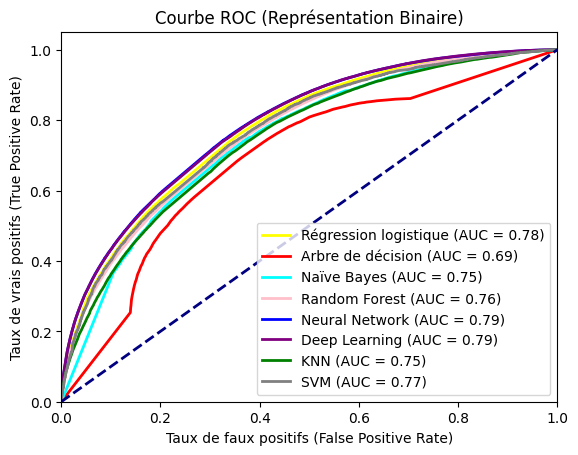

In [199]:
# Tracer les courbes ROC (binary representation)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='yellow', lw=2, label='Régression logistique (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Arbre de décision (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='cyan', lw=2, label='Naïve Bayes (AUC = %0.2f)' % roc_auc_nb)  
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf) 
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn) 
plt.plot(fpr_dl, tpr_dl, color='purple', lw=2, label='Deep Learning (AUC = %0.2f)' % roc_auc_dl)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_svm, tpr_svm, color='grey', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC (Représentation Binaire)')
plt.legend(loc="lower right")
plt.show()

Representation par comptage

In [158]:

# Calculer les scores ROC pour chaque modèle

# Logistic Regresison
fpr_lr, tpr_lr, _ = roc_curve(y_test_count, y_prob_lr_count)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_count, y_prob_dt_count)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# naive bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_count, y_prob_nb_count)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_count, y_prob_rf_count)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# neural network
fpr_nn, tpr_nn, _ = roc_curve(y_test_count, y_pred_proba_count_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_knn_count, y_prob_knn_count)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm_count, y_prob_svm_count)
roc_auc_svm = auc(fpr_svm, tpr_svm)


'# deep learning\nfpr_dl, tpr_dl, _ = roc_curve(y_test_count, y_pred_proba_count_dl)\nroc_auc_dl = auc(fpr_dl, tpr_dl)'

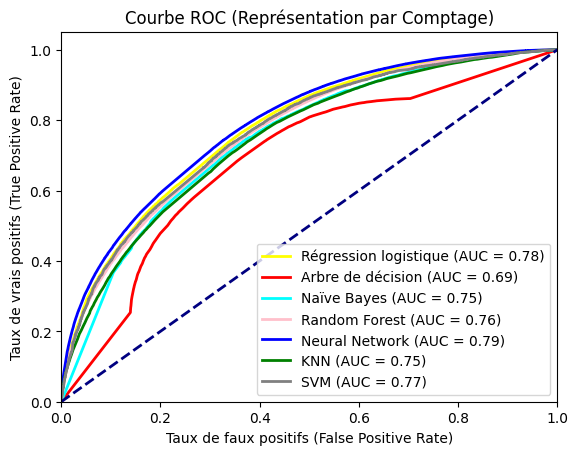

In [203]:
# Tracer les courbes ROC (binary representation)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='yellow', lw=2, label='Régression logistique (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Arbre de décision (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='cyan', lw=2, label='Naïve Bayes (AUC = %0.2f)' % roc_auc_nb)  
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)  
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)  
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='grey', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC (Représentation par Comptage)')
plt.legend(loc="lower right")
plt.show()

## 3.2. Confusion Matrix

### 3.2.1. binary

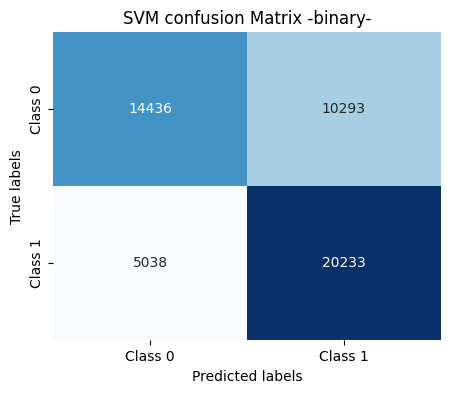

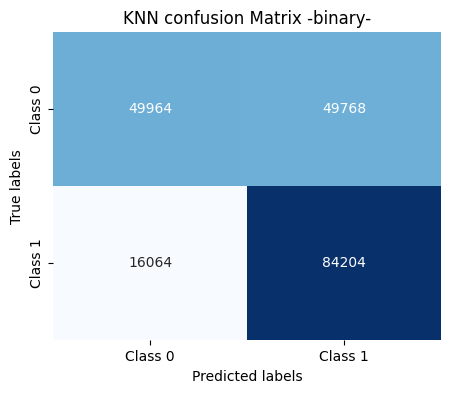

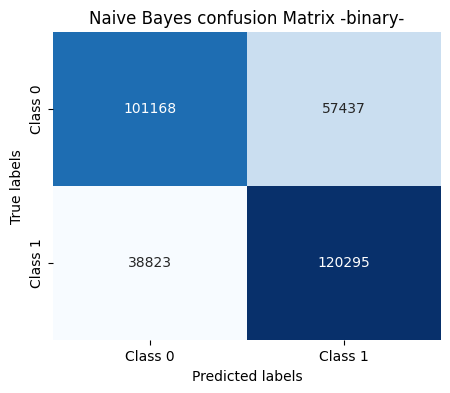

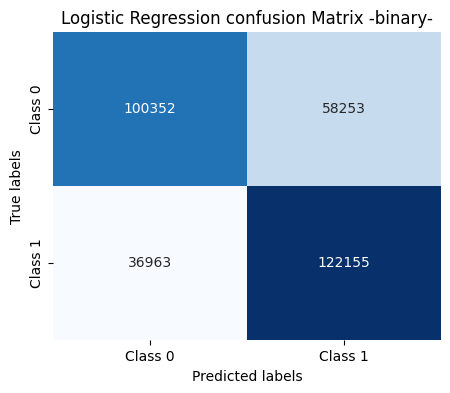

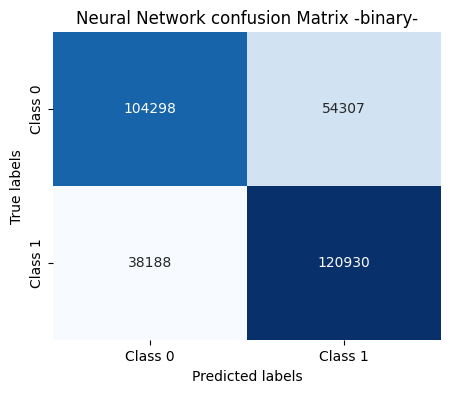

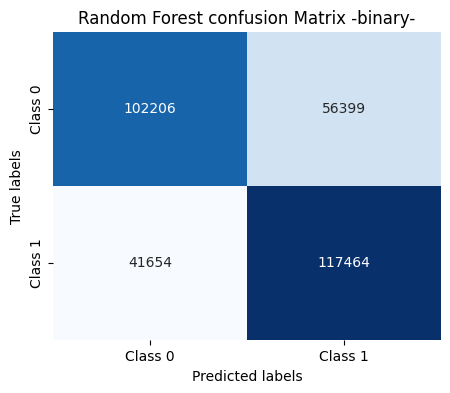

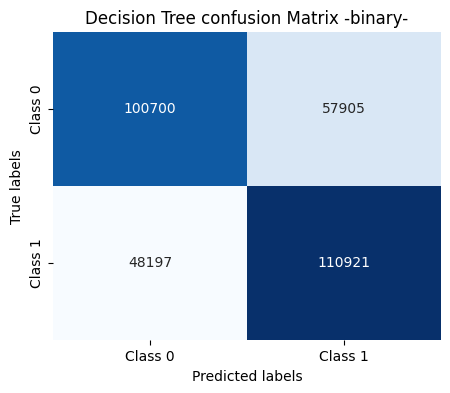

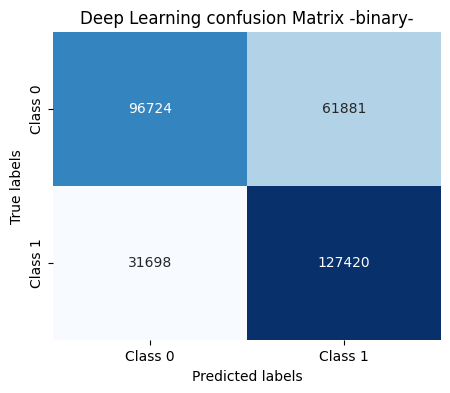

In [201]:
# SVM
plot_confusion_matrix(y_test_svm_binary, y_pred_binary_svm, 'SVM confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# KNN
plot_confusion_matrix(y_test_knn_binary, y_pred_knn_binary, 'KNN confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# naive bayes
plot_confusion_matrix(y_test_binary, y_pred_binary_nb, 'Naive Bayes confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# logistic regression
plot_confusion_matrix(y_test_binary, y_pred_binary_Log_reg, 'Logistic Regression confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# Neural Network
plot_confusion_matrix(y_test_binary, y_pred_nn, 'Neural Network confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# Random Forest
plot_confusion_matrix(y_test_binary, y_pred_binary_RF, 'Random Forest confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# Decision tree
plot_confusion_matrix(y_test_binary, y_pred_binary_DT, 'Decision Tree confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

# Deep Learning
plot_confusion_matrix(y_test_binary, y_pred_binary, 'Deep Learning confusion Matrix -binary-', labels=['Class 0', 'Class 1'])

3.2.2. Par comptage

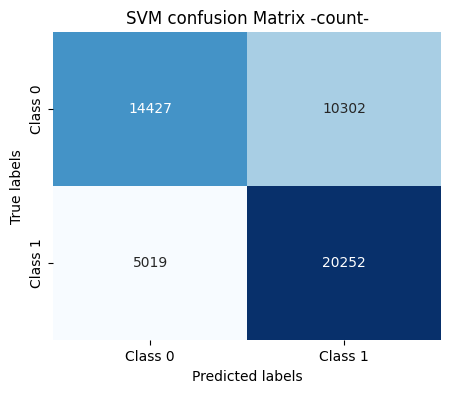

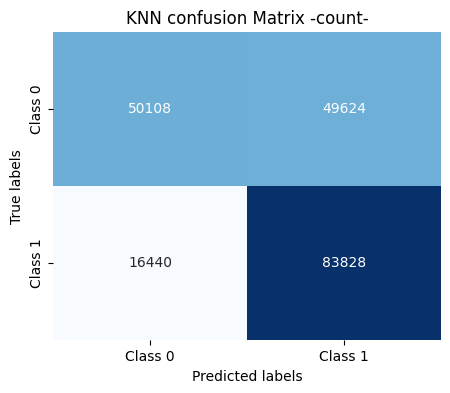

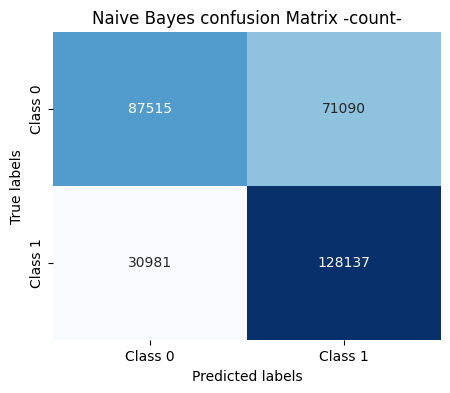

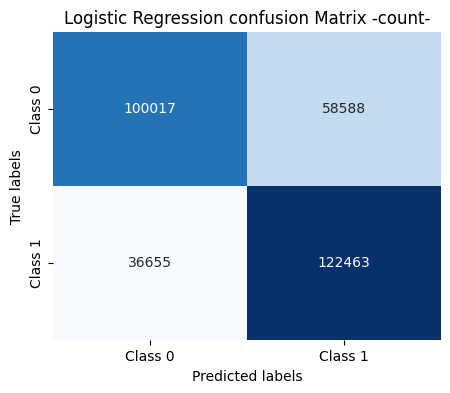

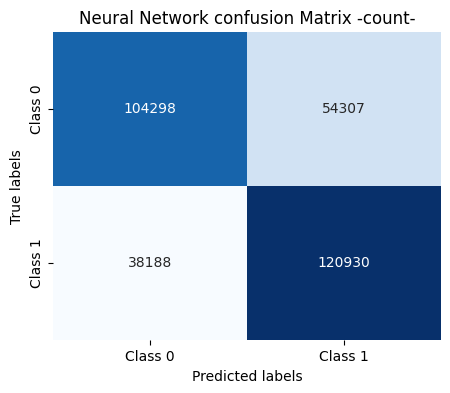

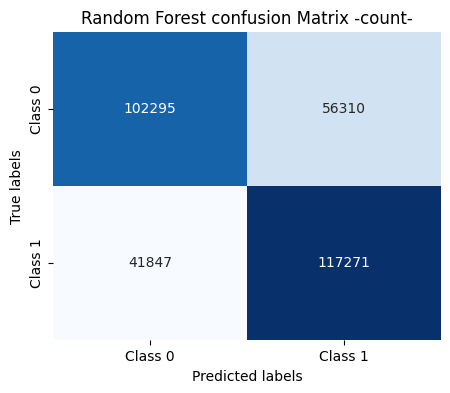

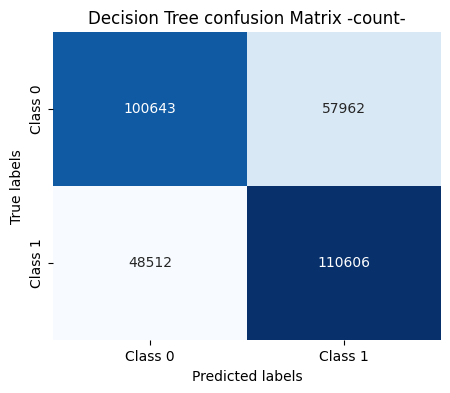

In [184]:
# SVM
plot_confusion_matrix(y_test_svm_count, y_pred_count_svm, 'SVM confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# KNN
plot_confusion_matrix(y_test_knn_count, y_pred_knn_count, 'KNN confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# naive bayes
plot_confusion_matrix(y_test_count, y_pred_count_nb, 'Naive Bayes confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# logistic regression
plot_confusion_matrix(y_test_count, y_pred_count_Log_reg, 'Logistic Regression confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# Neural Network
plot_confusion_matrix(y_test_count, y_pred_nn, 'Neural Network confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# Random Forest
plot_confusion_matrix(y_test_count, y_pred_count_RF, 'Random Forest confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# Decision tree
plot_confusion_matrix(y_test_count, y_pred_count_DT, 'Decision Tree confusion Matrix -count-', labels=['Class 0', 'Class 1'])

# Annoncer la fin du traitement

In [ ]:
import winsound
import time

frequency = 300  
duration = 1000  # 1 second

winsound.Beep(frequency, duration)
winsound.Beep(frequency+200, duration)
winsound.Beep(frequency, duration)
